In [23]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import seaborn as sb

In [69]:
worksheet = pd.read_csv(r"C:\Users\Alexander\Desktop\Springboard\PivotTables.csv")
worksheet.head()

,Date,Month,Year,Customer ID,Customer Age,Age Group,Customer Gender,Country,State,Product Category,Sub Category,Product,Frame Size,Order Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
0,11/26/2013,November,2013.0,11019.0,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8.0,45.0,120.0,360.0,950,590.0
1,11/26/2015,November,2015.0,11019.0,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,8.0,45.0,120.0,360.0,950,590.0
2,3/23/2014,March,2014.0,11039.0,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,23.0,45.0,120.0,1035.0,2401,1366.0
3,3/23/2016,March,2016.0,11039.0,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,20.0,45.0,120.0,900.0,2088,1188.0
4,5/15/2014,May,2014.0,11046.0,47.0,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,NaN,4.0,45.0,120.0,180.0,418,238.0


In [74]:
pivotsubset = worksheet[["Product Category", "Sub Category", "Year", "Revenue"]]
pivotsubset.head()

,Product Category,Sub Category,Year,Revenue
0,Accessories,Bike Racks,2013.0,950
1,Accessories,Bike Racks,2015.0,950
2,Accessories,Bike Racks,2014.0,2401
3,Accessories,Bike Racks,2016.0,2088
4,Accessories,Bike Racks,2014.0,418


In [17]:
pivot1 = pd.pivot_table(pivotsubset, index = ["Product Category", "Sub Category"],
                       values=["Revenue"], columns=["Year"],aggfunc=np.sum)
pivot1

Revenue                        \
Year                                   2011.0     2012.0     2013.0   
Product Category Sub Category                                         
Accessories      Bike Racks               NaN        NaN   112605.0   
                 Bike Stands              NaN        NaN    95396.0   
                 Bottles and Cages        NaN        NaN   292535.0   
                 Cleaners                 NaN        NaN    42840.0   
                 Fenders                  NaN        NaN   284577.0   
                 Helmets                  NaN        NaN  1285031.0   
                 Hydration Packs          NaN        NaN   237491.0   
                 Tires and Tubes          NaN        NaN  1033740.0   
Bikes            Mountain Bikes     2198270.0  2182853.0  3732841.0   
                 Road Bikes         6766618.0  6993130.0  4836352.0   
                 Touring Bikes            NaN        NaN  1289594.0   
Clothing         Caps                     NaN        NaN   117068.0   
                 Gloves                   NaN        NaN   191818.0   
                 Jerseys                  NaN        NaN   956093.0   
                 Shorts                   NaN        NaN   447464.0   
                 Socks                    NaN        NaN    32888.0   
                 Vests                    NaN        NaN   251704.0   

                                                                     
Year                                   2014.0     2015.0     2016.0  
Product Category Sub Category                                        
Accessories      Bike Racks          152966.0   107813.0   144416.0  
                 Bike Stands          83148.0    88822.0    76709.0  
                 Bottles and Cages   422000.0   285144.0   409495.0  
                 Cleaners             58013.0    41559.0    56409.0  
                 Fenders             347236.0   277261.0   336659.0  
                 Helmets            1629103.0  1250303.0  1576644.0  
                 Hydration Packs     264521.0   230850.0   257544.0  
                 Tires and Tubes    1336605.0  1004202.0  1296355.0  
Bikes            Mountain Bikes     2983026.0  5581524.0  4445012.0  
                 Road Bikes         3017127.0  7279822.0  4470012.0  
                 Touring Bikes      1611090.0  1937737.0  2457126.0  
Clothing         Caps                161372.0   113612.0   156725.0  
                 Gloves              250571.0   185339.0   243691.0  
                 Jerseys            1129894.0   927556.0  1100199.0  
                 Shorts              435603.0   433788.0   423855.0  
                 Socks                41825.0    31942.0    40516.0  
                 Vests               228624.0   246717.0   222018.0

In [81]:
worksheet.head()
df = worksheet.loc[worksheet.Country == "Germany"]
df = df.groupby(["State"]).Revenue.sum().sort_values(ascending=False)
df

State
Hessen                 2073391
Saarland               2029545
Nordrhein-Westfalen    1804900
Hamburg                1559005
Bayern                 1341985
Brandenburg             169770
Name: Revenue, dtype: int64

In [50]:
"""pivotSub2 = worksheet[["Country", "State", "Revenue", "Year"]]
pivotsub2 = pd.pivot_table(pivotSub2, index=["Country", "State"], 
                            values=["Revenue"], columns=["Year"], 
                            aggfunc=np.sum)
pivotsub2.query('Country == ["Germany"]')
"""

Revenue                                          \
Year                           2011.0    2012.0    2013.0    2014.0    2015.0   
Country State                                                                   
Germany Bayern               117195.0  120829.0  193034.0  267226.0  278047.0   
        Brandenburg            7268.0   11249.0   34355.0   33486.0   48520.0   
        Hamburg              124618.0  137850.0  277548.0  281576.0  368779.0   
        Hessen               230224.0  230652.0  316229.0  386423.0  409265.0   
        Nordrhein-Westfalen  155142.0  141564.0  288261.0  365008.0  395595.0   
        Saarland             199156.0  193044.0  343277.0  368789.0  430885.0   

                                       
Year                           2016.0  
Country State                          
Germany Bayern               365654.0  
        Brandenburg           34892.0  
        Hamburg              368634.0  
        Hessen               500598.0  
        Nordrhein-Westfalen  459330.0  
        Saarland             494394.0

In [83]:
"""pivotSub2 = worksheet[["Country", "State", "Revenue", "Year"]]
pivotSub2 = pivotSub2.loc[(pivotSub2.Year == 2013) & (pivotSub2.Country == "Germany")]
pivotSub2"""

,Country,State,Revenue,Year
48,Germany,Saarland,295,2013.0
62,Germany,Saarland,590,2013.0
94,Germany,Hessen,3125,2013.0
136,Germany,Nordrhein-Westfalen,209,2013.0
254,Germany,Hessen,558,2013.0
...,...,...,...,...
112754,Germany,Hamburg,1190,2013.0
112854,Germany,Saarland,840,2013.0
112940,Germany,Hessen,1488,2013.0
112942,Germany,Saarland,892,2013.0


In [84]:
df = worksheet.loc[(worksheet.Country == "Germany") & (worksheet.Year == 2013)]
df = df.groupby(["State"]).Revenue.sum().sort_values(ascending=False)
df

State
Saarland               343277
Hessen                 316229
Nordrhein-Westfalen    288261
Hamburg                277548
Bayern                 193034
Brandenburg             34355
Name: Revenue, dtype: int64

In [91]:
"""third = worksheet[["Frame Size", "Revenue"]]
third = pd.pivot_table(third, index=["Frame Size"], 
                            values=["Revenue"], 
                            aggfunc=np.sum)
third"""

,Revenue
Frame Size,
38.0,7934102
40.0,1810719
42.0,8385348
44.0,6487682
46.0,7231838
48.0,8197548
50.0,1875166
52.0,5957787
54.0,1600407


In [96]:
third = worksheet[["Frame Size", "Revenue"]]
third = third.groupby(["Frame Size"]).Revenue.sum().sort_values(ascending=False)
third

Frame Size
42.0    8385348
48.0    8197548
38.0    7934102
46.0    7231838
44.0    6487682
52.0    5957787
62.0    4287129
56.0    3158805
58.0    3111467
50.0    1875166
40.0    1810719
60.0    1744136
54.0    1600407
Name: Revenue, dtype: int64

In [99]:
fourth = worksheet[["Age Group", "Revenue"]]
fourth = fourth.groupby(["Age Group"]).Revenue.sum().sort_values()
fourth

Age Group
Seniors (64+)             308042
Youth (<25)             11723199
Young Adults (25-34)    30655614
Adults (35-64)          42584153
Name: Revenue, dtype: int64

This is where the exercises move to plots

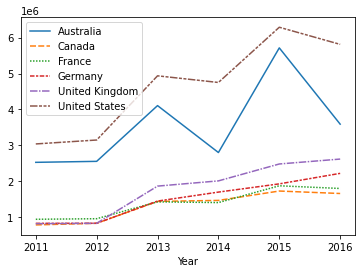

In [136]:
first = worksheet[["Country", "Revenue", "Year"]]
first = first.groupby(["Year", "Country"]).Revenue.sum()
first = first.unstack(level="Country")
first
sb.lineplot(data=first)

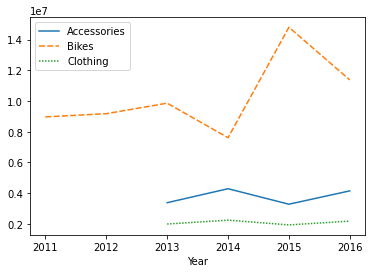

In [143]:
second = worksheet[["Product Category", "Revenue", "Year"]]
second = second.groupby(["Year", "Product Category"]).Revenue.sum()
second = second.unstack(level="Product Category")
second
sb.lineplot(data=second)

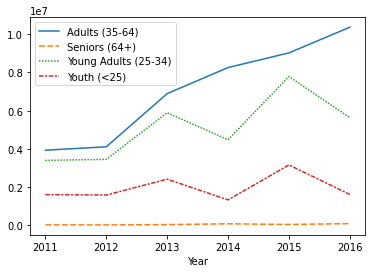

In [145]:
third = worksheet[["Age Group", "Revenue", "Year"]]
third = third.groupby(["Year", "Age Group"]).Revenue.sum()
third = third.unstack(level="Age Group")
third
sb.lineplot(data=third)

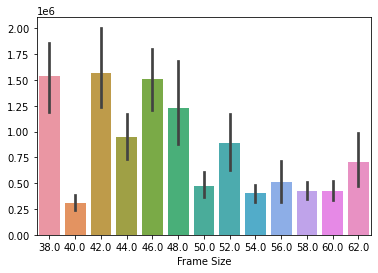

In [194]:
fourth = worksheet[["Frame Size", "Revenue", "Year"]]
fourth = fourth.groupby(["Year", "Frame Size"]).Revenue.sum()
fourth = fourth.unstack(level="Frame Size")
fourth = fourth.dropna()
sb.barplot(data=fourth)



In [215]:
"""fourth = worksheet[["Frame Size", "Revenue", "Year"]]
fourth = fourth.groupby(["Frame Size"]).Revenue.sum()
fourth = fourth.sort_values(ascending=False)
fourth.columns = ["Frame Size", "Revenue"]
fourth"""

'fourth = worksheet[["Frame Size", "Revenue", "Year"]]\nfourth = fourth.groupby(["Frame Size"]).Revenue.sum()\nfourth = fourth.sort_values(ascending=False)\nfourth.columns = ["Frame Size", "Revenue"]\nfourth'